<a href="https://colab.research.google.com/github/AndroGari/Financial-Sentiment-Analysis/blob/master/Financial_Sentiment_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install text_hammer #Installing text hammer, a text preprocessing tool package by Python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.22 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


Installing releveant modules and packages for data analysis and visualization using EDA


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt #library for data visualization
from matplotlib import cm #matplotlib colormaps
import warnings
warnings.filterwarnings('ignore') #ignoring warnings messages by warning filters

In [ ]:
import text_hammer as th

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [7]:
df.head() #our dataset has two attributes

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


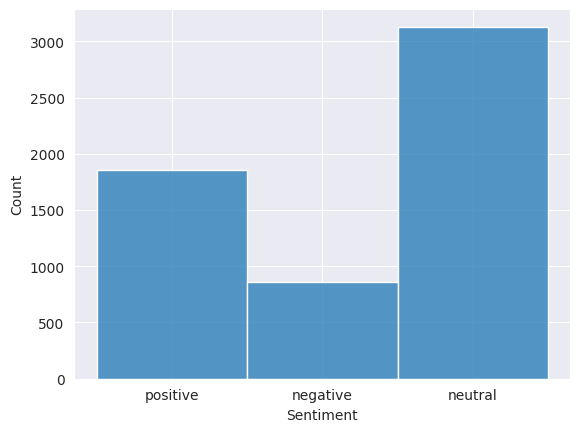

In [8]:
import seaborn as sns #for graphs in data visualization with matplotlib and sns, estimate ratio of the data distribution

sns.set_style('darkgrid')
sns.histplot(x='Sentiment',data=df)
plt.show()

In [9]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['Sentence'])) #to preprocess text data, lambda function to avoid naming/defining seperate function for smaller tasks
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23


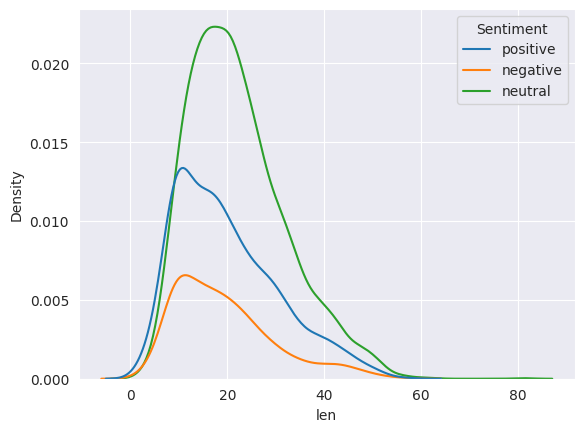

In [10]:
sns.kdeplot(x='len',hue='Sentiment',data=df) #visualiizing the ratio of density of characters to express sentiments by the users
plt.show()

In [11]:
mapdf = {'positive':0,'negative':1,'neutral':2} #label encoding for catalysing the text preprocessing task
df['Sentiment'] = list(map(lambda x:mapdf[x],df['Sentiment']))
df.head()

,Sentence,Sentiment,len
0,The GeoSolutions technology will leverage Bene...,0,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1,11
2,"For the last quarter of 2010 , Componenta 's n...",0,39
3,According to the Finnish-Russian Chamber of Co...,2,20
4,The Swedish buyout firm has sold its remaining...,2,23


In [12]:
print(df['Sentiment'].corr(df['len'])) #positive correlation implying skewed data with positive relationship between number of words as comment vs the sentiment being expressed

0.10137114484667775


In [13]:
sentences = df['Sentence'].copy()[:] #cleaning the text data to have clear analysis, removing noise such as html tags, continued expressions cont_exp such as I'm to I am, special OR ACCENTED characters and stop words
sentences = sentences.to_list()
sentences = list(map(lambda x: x.lower(),sentences))
sentences = list(map(lambda x: th.cont_exp(x),sentences))
sentences = list(map(lambda x: th.remove_emails(x),sentences))
sentences = list(map(lambda x: th.remove_html_tags(x),sentences))
sentences = list(map(lambda x: th.remove_stopwords(x),sentences))
sentences = list(map(lambda x: th.remove_special_chars(x),sentences))
sentences = list(map(lambda x: th.remove_accented_chars(x),sentences))
sentences = list(map(lambda x: th.make_base(x),sentences))

In [18]:
!pip install nltk #installing the natural language toolkit for NLP tasks such as classification, tokenization, stemming, tagging, parsing, & semantic reasoning

In [20]:
import nltk

nltk.download('punkt') #to have parameters from a corpus in an unsupervised way related to the target domain, such as a list of abbreviations, and acronyms
from tqdm import tqdm_notebook as tqdm #using tqdm python for having a progress meter or progress bar for the loops/iterations

pairs = []
for sent in tqdm(sentences):
    pairs.extend(nltk.word_tokenize(sent))
freq = nltk.FreqDist(pairs)
freq.most_common(10) #most commonly used words throughoyt the dataset of the market

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/5842 [00:00<?, ?it/s]

[('eur', 1284),
 ('company', 916),
 ('mn', 729),
 ('sale', 607),
 ('profit', 584),
 ('say', 574),
 ('finnish', 527),
 ('share', 514),
 ('net', 499),
 ('million', 493)]

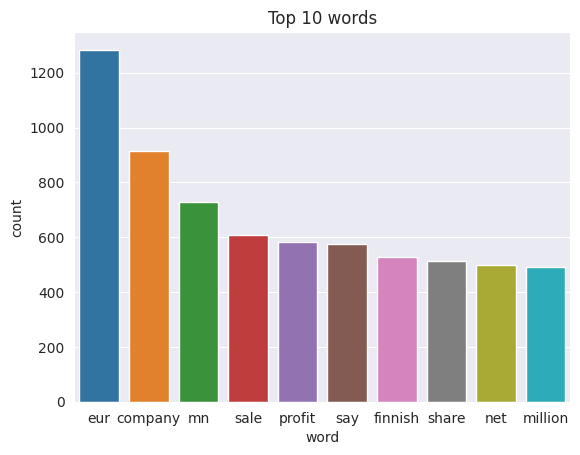

In [21]:
tempdf = pd.DataFrame(freq.most_common(10),  columns=['word', 'count']) #visualizing the occurance of the most used words
sns.barplot(x='word',y='count',data=tempdf)
plt.title("Top 10 words")
plt.show()

In [23]:
!pip install keras #to have state-of-the-art preset weights and architectures for our deep learning model

In [26]:
from sklearn.model_selection import train_test_split
# from keras.utils.all_utils import to_categorical
from tensorflow.python.keras.utils.np_utils import to_categorical #update of keras and tensorflow

x = sentences.copy()
y = to_categorical(df['Sentiment'])
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42) #splitting the training and testing dataset

In [27]:
from keras.preprocessing.text import Tokenizer #for word tokenization and detokenization


num_words = 12000 #Only the most frequent num_words words will be kept, the rest will be discarded, defining the maximum number of words to consider
tokenizer=Tokenizer(num_words,lower=True) #all text would be converted to lowercase

df_total = pd.concat([pd.Series(X_train), pd.Series(X_test)], axis = 0)
tokenizer.fit_on_texts(df_total)

In [30]:
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences #to ensure all the inputs are of fixed dimensions using padding

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_, maxlen=81, padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 81, padding = 'post')

In [31]:
print(X_train_pad.shape,X_test_pad.shape)

(4089, 81) (1753, 81)


In [32]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout #for layers of the neural network

First Model: LSTM with 3 drop out layers, 3 bidirectional Layers and 4 dense layers

In [33]:
lstm = Sequential()
lstm.add(Embedding(input_dim = num_words, output_dim = 100, input_length= X_train_pad.shape[1]))

lstm.add(Dropout(0.2)) #to prevent overfitting
lstm.add(Bidirectional(LSTM(128,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(256,return_sequences=True)))
lstm.add(Dropout(0.2))
lstm.add(Bidirectional(LSTM(128,return_sequences=False)))
lstm.add(Dense(64,activation='tanh'))
lstm.add(Dense(32,activation='tanh'))
lstm.add(Dense(10,activation='tanh'))
lstm.add(Dense(3,activation='softmax')) # for non-linear transformatio=n

In [34]:
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #compiling the model using Adam optimizer

In [35]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 81, 100)           1200000   
                                                                 
 dropout (Dropout)           (None, 81, 100)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 81, 256)          234496    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 81, 512)          1050624   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 81, 512)           0

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint #creating checkpoints

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5) #to  monitor over the validation loss, verbosity and wait for few epochs before stopping
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True) #to save the weights of the highest validation accuracy

In [37]:
lstm_history = lstm.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.9353 - accuracy: 0.5608
Epoch 1: val_accuracy improved from -inf to 0.64746, saving model to ./model.h5
64/64 [==============================] - 139s 2s/step - loss: 0.9353 - accuracy: 0.5608 - val_loss: 0.8457 - val_accuracy: 0.6475
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.7398
Epoch 2: val_accuracy improved from 0.64746 to 0.68625, saving model to ./model.h5
64/64 [==============================] - 135s 2s/step - loss: 0.6537 - accuracy: 0.7398 - val_loss: 0.7743 - val_accuracy: 0.6863
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.8188
Epoch 3: val_accuracy did not improve from 0.68625
64/64 [==============================] - 134s 2s/step - loss: 0.4378 - accuracy: 0.8188 - val_loss: 0.9190 - val_accuracy: 0.6788
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.8745
Epoch 4: val_accurac

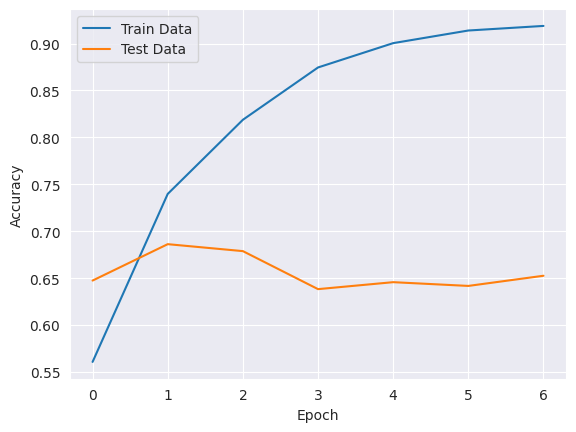

In [38]:
plt.plot(lstm_history.history['accuracy'], label='Train Data')
plt.plot(lstm_history.history['val_accuracy'], label='Test Data')

plt.xlabel('Epoch')
plt.ylabel('Accuracy') #the testing and training data are really far from each other

plt.legend(loc='best')
plt.show()

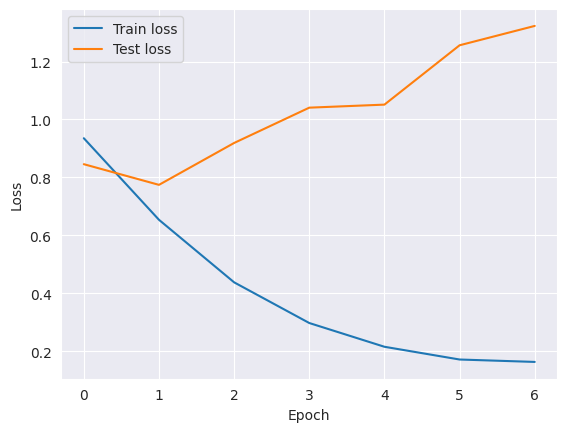

In [39]:
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.metrics import classification_report

predictions = lstm.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 18s 280ms/step
              precision    recall  f1-score   support

    positive       0.62      0.77      0.69       556
    negative       0.35      0.16      0.22       258
     neutral       0.71      0.72      0.71       939

    accuracy                           0.65      1753
   macro avg       0.56      0.55      0.54      1753
weighted avg       0.63      0.65      0.63      1753



Glove LSTM model

In [41]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-300')

[=================================================-] 99.0% 372.5/376.1MB downloaded


In [42]:
glove_gensim.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.6713277101516724)]

In [43]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: # since index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10912 [00:00<?, ?it/s]

In [44]:
gensim_weight_matrix.shape

(12000, 300)

In [45]:
glove = Sequential()
glove.add(Embedding(input_dim = num_words, output_dim = 300, input_length= X_train_pad.shape[1], weights = [gensim_weight_matrix], trainable = False))

glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(256,return_sequences=True)))
glove.add(Dropout(0.2))
glove.add(Bidirectional(LSTM(128,return_sequences=False)))
glove.add(Dense(64,activation='tanh'))
glove.add(Dense(32,activation='tanh'))
glove.add(Dense(10,activation='tanh'))
glove.add(Dense(3,activation='softmax'))

In [46]:
glove.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_3 (Dropout)         (None, 81, 300)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 81, 256)          439296    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 81, 512)          1050624   
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 81, 512)          

In [47]:
glove.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

glove_history = glove.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.8595 - accuracy: 0.6036
Epoch 1: val_accuracy did not improve from 0.68625
64/64 [==============================] - 166s 2s/step - loss: 0.8595 - accuracy: 0.6036 - val_loss: 0.8051 - val_accuracy: 0.6264
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.7255 - accuracy: 0.6833
Epoch 2: val_accuracy did not improve from 0.68625
64/64 [==============================] - 132s 2s/step - loss: 0.7255 - accuracy: 0.6833 - val_loss: 0.7252 - val_accuracy: 0.6857
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.7144
Epoch 3: val_accuracy did not improve from 0.68625
64/64 [==============================] - 143s 2s/step - loss: 0.6619 - accuracy: 0.7144 - val_loss: 0.7310 - val_accuracy: 0.6817
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.6040 - accuracy: 0.7435
Epoch 4: val_accuracy did not improve from 0.68625
64/64 [=======================

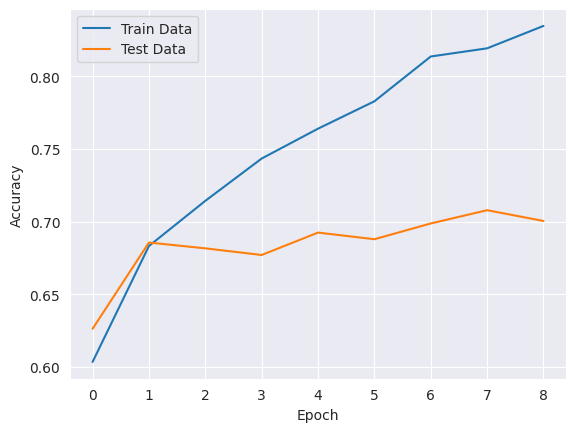

In [48]:
plt.plot(glove_history.history['accuracy'], label='Train Data')
plt.plot(glove_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.98, 1])
plt.legend(loc='best')
plt.show()

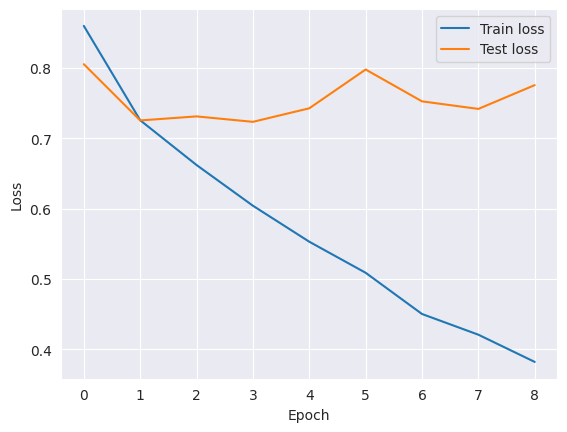

In [49]:
plt.plot(glove_history.history['loss'], label='Train loss')
plt.plot(glove_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [50]:
predictions = glove.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 20s 322ms/step
              precision    recall  f1-score   support

    positive       0.76      0.66      0.70       556
    negative       0.42      0.26      0.32       258
     neutral       0.72      0.85      0.78       939

    accuracy                           0.70      1753
   macro avg       0.63      0.59      0.60      1753
weighted avg       0.69      0.70      0.69      1753



Glove vector embedding along with GRU as recurrent layer instead of LSTM

In [63]:
from keras.layers import GRU
gru = Sequential()
gru.add(Embedding(input_dim = num_words, output_dim = 300, input_length= X_train_pad.shape[1], weights = [gensim_weight_matrix], trainable = False))

gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(256,return_sequences=True)))
gru.add(Dropout(0.2))
gru.add(Bidirectional(GRU(128,return_sequences=False)))
gru.add(Dense(64,activation='tanh'))
gru.add(Dense(32,activation='tanh'))
gru.add(Dense(10,activation='tanh'))
gru.add(Dense(3,activation='softmax'))

In [64]:
gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_12 (Dropout)        (None, 81, 300)           0         
                                                                 
 bidirectional_12 (Bidirecti  (None, 81, 256)          330240    
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 81, 256)           0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 81, 512)          789504    
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 81, 512)          

In [65]:
gru.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
gru_history = gru.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.9186 - accuracy: 0.5676
Epoch 1: val_accuracy did not improve from 0.70793
64/64 [==============================] - 119s 2s/step - loss: 0.9186 - accuracy: 0.5676 - val_loss: 0.8534 - val_accuracy: 0.6258
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.6420
Epoch 2: val_accuracy did not improve from 0.70793
64/64 [==============================] - 108s 2s/step - loss: 0.8076 - accuracy: 0.6420 - val_loss: 0.8053 - val_accuracy: 0.6497
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.6676
Epoch 3: val_accuracy did not improve from 0.70793
64/64 [==============================] - 107s 2s/step - loss: 0.7626 - accuracy: 0.6676 - val_loss: 0.7889 - val_accuracy: 0.6560
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.7345 - accuracy: 0.6875
Epoch 4: val_accuracy did not improve from 0.70793
64/64 [=======================

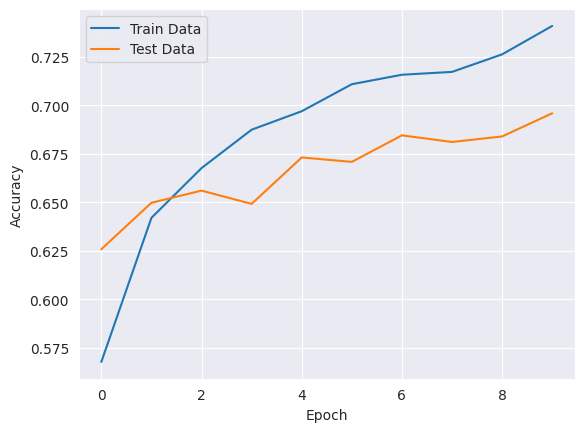

In [67]:
plt.plot(gru_history.history['accuracy'], label='Train Data')
plt.plot(gru_history.history['val_accuracy'], label='Test Data')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.show()

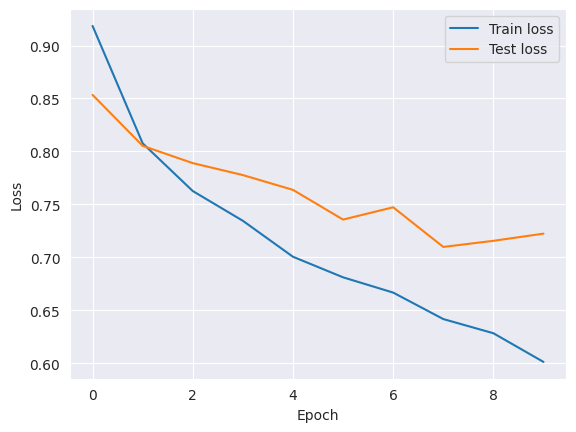

In [68]:
plt.plot(gru_history.history['loss'], label='Train loss')
plt.plot(gru_history.history['val_loss'], label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [69]:
predictions = gru.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 16s 255ms/step
              precision    recall  f1-score   support

    positive       0.64      0.76      0.70       556
    negative       0.70      0.10      0.18       258
     neutral       0.73      0.82      0.77       939

    accuracy                           0.70      1753
   macro avg       0.69      0.56      0.55      1753
weighted avg       0.70      0.70      0.66      1753



Fasttext vector embedding with lstm

In [51]:
import gensim.downloader as api
glove_gensim  = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [52]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tqdm(tokenizer.word_index.items()):
    if index < num_words: #as index starts with zero
        try:
            gensim_weight_matrix[index] = glove_gensim[word]
        except:
            gensim_weight_matrix[index] = np.zeros(300)

  0%|          | 0/10912 [00:00<?, ?it/s]

In [53]:
ftext = Sequential()
ftext.add(Embedding(input_dim = num_words, output_dim = 300, input_length= X_train_pad.shape[1], weights = [gensim_weight_matrix], trainable = False))

ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(256,return_sequences=True)))
ftext.add(Dropout(0.2))
ftext.add(Bidirectional(LSTM(128,return_sequences=False)))
ftext.add(Dense(64,activation='tanh'))
ftext.add(Dense(32,activation='tanh'))
ftext.add(Dense(10,activation='tanh'))
ftext.add(Dense(3,activation='softmax'))

In [54]:
ftext.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 81, 300)           3600000   
                                                                 
 dropout_6 (Dropout)         (None, 81, 300)           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 81, 256)          439296    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 81, 256)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 81, 512)          1050624   
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 81, 512)          

In [55]:
ftext.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
ftext_history = ftext.fit(X_train_pad,y_train, epochs = 10, batch_size = 64, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.9303 - accuracy: 0.5588
Epoch 1: val_accuracy did not improve from 0.70793
64/64 [==============================] - 159s 2s/step - loss: 0.9303 - accuracy: 0.5588 - val_loss: 0.8702 - val_accuracy: 0.6115
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.8273 - accuracy: 0.6341
Epoch 2: val_accuracy did not improve from 0.70793
64/64 [==============================] - 143s 2s/step - loss: 0.8273 - accuracy: 0.6341 - val_loss: 0.8190 - val_accuracy: 0.6292
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.7794 - accuracy: 0.6584
Epoch 3: val_accuracy did not improve from 0.70793
64/64 [==============================] - 142s 2s/step - loss: 0.7794 - accuracy: 0.6584 - val_loss: 0.7816 - val_accuracy: 0.6515
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.6816
Epoch 4: val_accuracy did not improve from 0.70793
64/64 [=======================

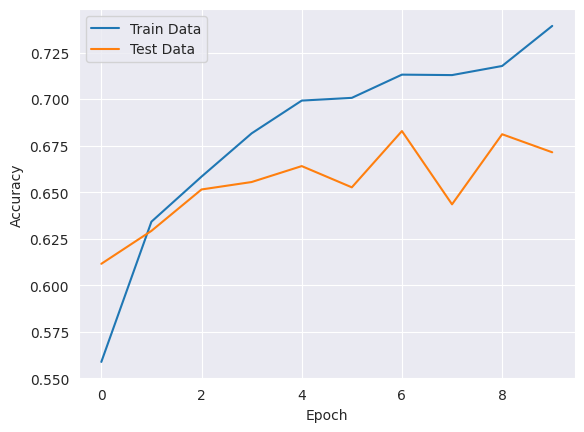

In [59]:
plt.plot(ftext_history.history['accuracy'], label='Train Data')
plt.plot(ftext_history.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.show()

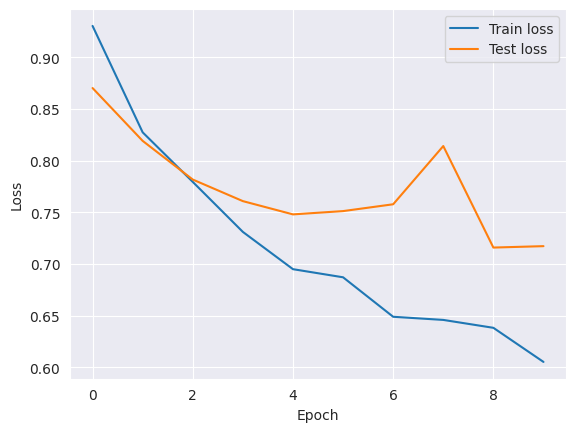

In [60]:
plt.plot(ftext_history.history['loss'], label='Train loss')
plt.plot(ftext_history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [61]:
predictions = ftext.predict(X_test_pad)
target_names=['positive','negative','neutral']
print(classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1),target_names=target_names))

55/55 [==============================] - 19s 309ms/step
              precision    recall  f1-score   support

    positive       0.68      0.63      0.65       556
    negative       0.41      0.50      0.45       258
     neutral       0.75      0.74      0.75       939

    accuracy                           0.67      1753
   macro avg       0.62      0.62      0.62      1753
weighted avg       0.68      0.67      0.67      1753

